# Lista Aberta do Módulo 3 - Comparando Regressão Lasso e KNN

**Regras para envio:**

1. Faça uma cópia deste arquivo
2. Deixe o arquivo aberto para qualquer pessoa com o link (Share > Anyone with the link)
3. Garanta que as saídas do notebook estão salvas (Settings > deixe desligada a opção (New notebooks use private outputs (omit outputs when saving)), e acesse o link depois em outro navegador para garantir que estão!)
4. Digite seu nome ##**Lorrayne Somerlatte dos Santos**###
5. Após finalizar o exercício, poste o link (apenas o link!) no moodle. 

**Atenção**: como temos pouco tempo para o fechamento do semestre, por favor garantam que seus links estão corretos! Não teremos tempo para correções. É essencial que os alunos de ICD saibam usar o Google Colab.

## Predizendo a glicose do sangue - Diabetes Dataset

Neste trabalho você deverá realizar uma **comparação entre o k-Nearest Neighbors (KNN) e a Regressão Lasso para predição da glicose do sangue**. Para isso, usaremos o dataset de diabetes de Stanford (já embutido no sklearn). Notem que as variáveis já estão normalizadas. 

A avaliação dos métodos deverá ser feito usando **o erro quadrado médio, usando validação cruzada k-fold com k igual a 5**.  

Você não precisa implementar os métodos, já que estão disponíveis na biblioteca scikit-learn da linguagem Python. Se necessário, pode fazer mais importações de bibliotecas.

## Importando módulos e baixando dataset

In [499]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets as data
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error



from sklearn import linear_model as lm
from sklearn import metrics
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold

In [500]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data,columns =[diabetes.feature_names])

In [501]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [502]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [503]:
# Variavel que queremos predizer
TARGET = "s6"

# Número de folds da validação cruzada
SPLITS = 5

Se tiver dúvidas sobre a validação cruzada, recomendo :https://machinelearningmastery.com/k-fold-cross-validation/ . Busque também outros materiais, o importante é você conhecer e saber utilizar a validação cruzada, que é bem mais robusta que a simples divisão em treino e teste. 

# Exercício 01: 

Execute a regressão lasso para explicar o fator s6 (isto é, glicose) dos dados a partir dos outros fatores. 

Para a questão, faça as seguintes tarefas:

* Realize validação cruzada, com k-fold igual a 5
* Reporte o erro quadrado médio (dos 5 folds de validação do cross validation)

In [504]:
diabetes_df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
diabetes_df['Progression'] = diabetes.target
X = diabetes_df.drop(columns='Progression',axis='columns')
Y = diabetes_df['Progression']

In [505]:
lasso1 = Lasso()


model_lasso1 = lasso1.fit(X_train, y_train)


y_pred_train_lasso1 = lasso1.predict(X_train)
y_pred_test_lasso1 = lasso1.predict(X_test)


print('Lasso Training accuracy : {}\n'.format(r2_score(y_train, y_pred_train_lasso1).round(5)))
print('Lasso Testing accuracy : {}'.format(r2_score(y_test, y_pred_test_lasso1).round(5)))

Lasso Training accuracy : 0.36463

Lasso Testing accuracy : 0.35759


In [506]:
model = LinearRegression()
scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error',
                         cv=SPLITS, n_jobs=-1)
np.mean(np.absolute(scores))

44.27640232231223

In [507]:
mse3 = cross_val_score(lasso1, X, Y, scoring = 'neg_mean_squared_error',cv=5)
mean_mse3 = np.mean(mse3)
print(-(mean_mse3).round(5))

3850.83643


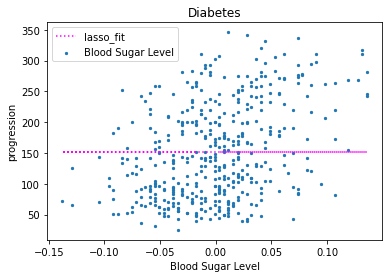

In [508]:
plt.title("Diabetes")
plt.scatter(X_glu, y, SPLITS, label= "Blood Sugar Level")

#plt.plot(X_glu, reg.predict(X_glu),color='cyan', linestyle='dashed' ,label = 'reg_fit') 
plt.plot(X_glu, lasso_reg.predict(X_glu),color='magenta',linestyle='dotted',label = 'lasso_fit') 
#plt.plot(X_glu, ridge_reg.predict(X_glu),color='red', linestyle=':', label = 'ridge_fit') 

plt.xlabel("Blood Sugar Level")
plt.ylabel("progression")
plt.legend()

# Exercício 02: 

Execute a knn para explicar o fator s6 (isto é, glicose) dos dados a partir dos outros fatores.

Para a questão, faça as seguintes tarefas:

* Escolha e reporte resultados com 3 números de vizinhos diferentes (k)
* Realize validação cruzada, com k-fold igual a 5 (para cada um dos k vizinhos)
* Reporte o erro quadrado médio (dos 5 folds de validação do cross validation)

OBS: Não confundir o k-fold com os k vizinhos! Um conceito não tem relação com o outro.

In [509]:
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train, y_train)
print('K-NN training accuracy: {:.2f}'.format(knn.score(X_train, y_train)))
print('K-NN testing accuracy: {:.2f}'.format(knn.score(X_test, y_test)))

K-NN training accuracy: 0.52
K-NN testing accuracy: 0.42


In [510]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error',
                         cv=SPLITS, n_jobs=-1)
np.mean(np.absolute(scores))

44.38367406166301

In [511]:
knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(X_train, y_train)
print('K-NN training accuracy: {:.2f}'.format(knn.score(X_train, y_train)))
print('K-NN testing accuracy: {:.2f}'.format(knn.score(X_test, y_test)))

K-NN training accuracy: 0.52
K-NN testing accuracy: 0.43


In [512]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error',
                         cv=SPLITS, n_jobs=-1)
np.mean(np.absolute(scores))

44.38367406166301

In [513]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
print('K-NN training accuracy: {:.2f}'.format(knn.score(X_train, y_train)))
print('K-NN testing accuracy: {:.2f}'.format(knn.score(X_test, y_test)))

K-NN training accuracy: 0.64
K-NN testing accuracy: 0.36


In [514]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error',
                         cv=SPLITS, n_jobs=-1)
np.mean(np.absolute(scores))

44.38367406166301

In [515]:
mse3 = cross_val_score(lasso1, X_train, y_train, scoring = 'neg_mean_squared_error',cv=5)
mean_mse3 = np.mean(mse3)
print(-(mean_mse3).round(5))

3916.51211


# Exercício 03: 

Compare os resultados (Pode ser bem direto ao ponto).

Pelo resultado dos scores, o knn nos daria uma melhor pecisão, pois o testing accuracy mostra bons resultados com um maior número de vizinhos.